# 1. Exploratory Data Analysis (EDA)

In this notebook, we will do the following things:

1. Import the data as data frame using pandas (the file is stored in local PC)
2. Data preparation: merging data set etc
3. Basic understanding: how many features, how many instances, how many targets
4. Visualization of the data distribution
5. Demonstration of overfitting if we do not reduce the number of features and blindly use linear regression

1.1 Data Preparation

In [1]:
# import necessary packages

# Plot the figures inline, necessary only for Jupyter notebook
%matplotlib inline 

import os # miscelleaneous operating system interface
import numpy as np  # import numpy
import pandas as pd # import pandas
import matplotlib.pyplot as plt 
import seaborn as sns # import seaborn for data visualization

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import root_mean_squared_error as RMSE # calculate RMSE
from sklearn.pipeline import Pipeline # may need it later for feature engineering
from sklearn.model_selection import train_test_split # splitting data into training and testing set

In [2]:
# import the data set for drugs

df_drug=pd.read_csv('GDSC2_label_14drugs.csv') # load the data set for drugs (limited to 14 drugs)
df_drug.set_index('Unnamed: 0', inplace=True)

print(df_drug.shape) # shape for drug data

# Result: 805 tumor cells (cell lines) and 14 drugs
# df_drug.head(5) # print the first 5 instances to have a look

# We only focus on the 3 drugs with largest variances in their efficacies among different drugs
drug_sort=df_drug.std().sort_values(ascending = False).iloc[0:3]

(805, 14)


In [3]:
# import the data set for tumor cells (cell lines) and genes

df_tumor=pd.read_csv('GDSC2_expression14.csv') # load the data set for tumors and cell lines
df_tumor.set_index('Unnamed: 0', inplace=True)

gene=list(df_tumor.columns)
print('Number of genes:', len(gene))
# print('First gene: ',gene[0])

print('Shape of data frame', df_tumor.shape) # shape for tumor data
# df_tumor.iloc[0:5, 0:10] # print the first 5 instances to have a look, only print the first 10 columns

# Result: 805 tumor cells (instances) and 17419 genes (features)

Number of genes: 17419
Shape of data frame (805, 17419)


In [4]:
# The 3 drugs with the largest variances among all 805 tumors

drug1=drug_sort.index[0] # 'Docetaxel'
drug2=drug_sort.index[1] # 'Trametinib'
drug3=drug_sort.index[2] # 'Entinostat'

# Merge the two data set together WITHOUT any selection of features
# We do not need to save too many decimal places, keep 2 decimal places is fine
# The last column becomes the drug efficacy

df_1=pd.concat([df_tumor, df_drug[drug1].round(2)], axis=1) # axis=1 because we join the columns, not rows
df_2=pd.concat([df_tumor, df_drug[drug2].round(2)], axis=1) 
df_3=pd.concat([df_tumor, df_drug[drug3].round(2)], axis=1) 

print(df_1.shape)
df_1.head(5)

(805, 17420)


,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,OR1D5,ZNF234,MYH4,LINC00526,PPY2,KRT18P55,POLRMTP1,UBL5P2,TBC1D3P5,Docetaxel
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
DATA.683665,3.238273,2.982254,10.235491,4.856061,4.078870,9.116236,3.658590,6.145475,5.042464,5.438402,...,3.724013,3.981948,2.823245,5.866047,3.095716,3.274367,3.056214,9.446305,3.530871,0.48
DATA.683667,7.780713,2.753253,9.960137,4.351073,3.716740,3.222277,8.221606,3.823474,4.756228,5.805642,...,3.779354,4.504481,2.690651,3.347520,3.230713,3.102091,3.169188,9.810430,3.266915,0.52
DATA.684052,7.301344,2.890533,9.922489,4.125088,3.678987,3.096576,3.588391,4.809305,4.951782,5.089165,...,3.762301,4.177345,2.499803,5.054260,3.003521,3.068187,3.135479,9.073222,3.098364,0.40
DATA.684057,8.233101,2.824687,10.015884,4.749715,3.839433,3.142754,5.329830,3.272124,5.538055,6.428482,...,3.226083,4.666295,2.491254,6.261573,3.031862,3.322455,2.813440,8.893197,3.266184,0.19
DATA.684059,8.333466,3.966757,9.793991,3.976923,3.505669,3.079943,3.373640,4.199048,5.794734,5.902391,...,3.738082,4.705392,2.667882,3.885425,2.993918,3.219777,3.033869,8.691401,3.279230,0.37


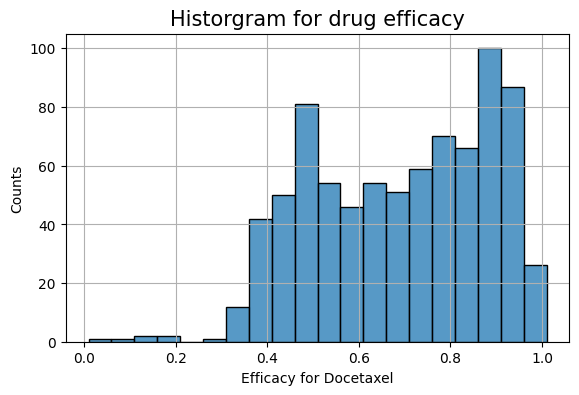

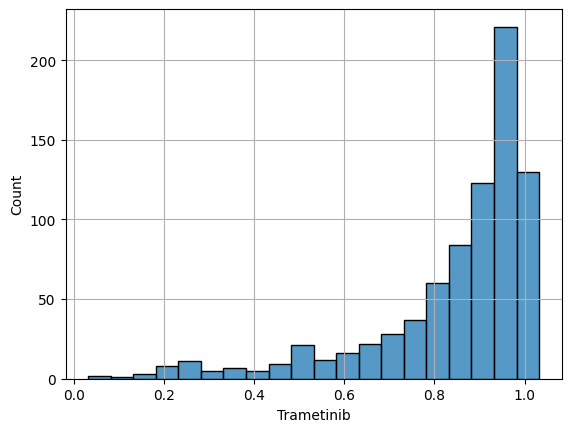

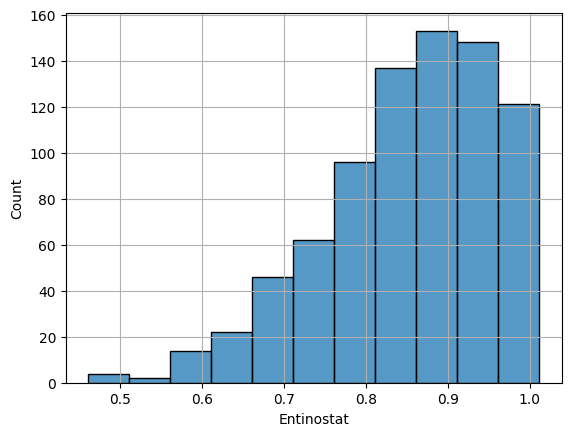

In [5]:
# Plot the distribution of drug efficacy
fig, ax = plt.subplots(figsize = (6.5,4)) 
  
sns.histplot(data=df_drug, x=drug1, binwidth=0.05)
ax.set_xlabel( 'Efficacy for %s'  %drug1 , size = 10) 
ax.set_ylabel( "Counts" , size = 10) 
ax.set_title( "Historgram for drug efficacy", size = 15) 
plt.grid()
plt.show() 

sns.histplot(data=df_drug, x=drug2, binwidth=0.05)
ax.set_xlabel( 'Efficacy for %s'  %drug2 , size = 10) 
ax.set_ylabel( "Counts" , size = 10) 
ax.set_title( "Historgram for drug efficacy", size = 15) 
plt.grid()
plt.show()

sns.histplot(data=df_drug, x=drug3, binwidth=0.05)
ax.set_xlabel( 'Efficacy for %s'  %drug3 , size = 10) 
ax.set_ylabel( "Counts" , size = 10) 
ax.set_title( "Historgram for drug efficacy", size = 15) 
plt.grid()
plt.show() 

# 2. Problem of overfitting

Before the exploratory data analysis and data visualization, we will probably encounter a probem known as overfitting in our training model. The above exploration tells us that there are 17419 genes (features) but only 805 cell lines (tumors). Due to the much larger number of features compared to the instances, the model can overfit the training set. More specifically, the model may not generalize well to the test set! To demonstrate such a potential problem, we do the "simplest" thing first: blindly train a linear regression model...

In [6]:
# Blindly train a simple linear regression model with all features using Scikit-Learn
# Key: May observe overfitting as we have too many features but few instances

# 20% of the data is used as test set, meaning 161 cell lines are saved for the test set
df_train_1, df_test_1 = train_test_split(df_1, shuffle=True, random_state=42, test_size=.2)

# print some basic information for checking before fitting
print ("shape of training set: ", df_train_1.shape)
print ("shape of test set: ", df_test_1.shape)

# Let us train the model for the first drug: Docetaxel
lin_reg=LinearRegression()
lin_reg.fit(df_train_1.drop(drug1, axis=1), df_train_1.iloc[:,-1:])

# The resuls: y_0 + y_coeff dot (genes)
# y_0, y_coeff = lin_reg.intercept_, lin_reg.coef_

# Calculate the RMSE
ytrain_p = lin_reg.predict(df_train_1.drop(drug1, axis=1))
train_lin_rmse = RMSE(df_train_1.iloc[:,-1:], ytrain_p) # Calculate RMSE instead of MSE

ytest_p = lin_reg.predict(df_test_1.drop(drug1, axis=1))
test_lin_rmse = RMSE(df_test_1.iloc[:,-1:], ytest_p)

# I take square root for the MSE obtained from Scikit-Learn
print ("RMSE for the linear fit for the training set: ", np.round(train_lin_rmse,2))
print ("RMSE for the linear fit for the test set: ", np.round(test_lin_rmse,2))

# Comments: See the overfitting below

# RMSE for the training set is 0 (Perfect! well, we know the reasons...)
# RMSE for the test set is 0.17
# This is a clear signal of overfitting ---> Too many features, too few samples!

shape of training set:  (644, 17420)
shape of test set:  (161, 17420)
RMSE for the linear fit for the training set:  0.0
RMSE for the linear fit for the test set:  0.17


In [7]:
# Let us train a new linear model for second drug: Trametinib
df_train_2, df_test_2 = train_test_split(df_2, shuffle=True, random_state=42, test_size=.2)

lin_reg=LinearRegression()
lin_reg.fit(df_train_2.drop(drug2, axis=1), df_train_2.iloc[:,-1:])

# The resuls: y_0 + y_coeff dot (genes)
# y_0, y_coeff = lin_reg.intercept_, lin_reg.coef_

# Calculate the RMSE
ytrain_p = lin_reg.predict(df_train_2.drop(drug2, axis=1))
train_lin_rmse = RMSE(df_train_2.iloc[:,-1:], ytrain_p)

ytest_p = lin_reg.predict(df_test_2.drop(drug2, axis=1))
test_lin_rmse = RMSE(df_test_2.iloc[:,-1:], ytest_p)

# I take square root for the MSE obtained from Scikit-Learn
print ("RMSE for the linear fit for the training set: ", np.round(train_lin_rmse,2))
print ("RMSE for the linear fit for the test set: ", np.round(test_lin_rmse,2))

# Well, also overfitting for Trametinib...

RMSE for the linear fit for the training set:  0.0
RMSE for the linear fit for the test set:  0.18
